# Model 1

## Naive Bayes

## Importing the Libraries

In [50]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('diabetes.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Checking if columns contains 0 values or not

In [6]:
print(dataset[dataset['Glucose']==0].shape[0])
print(dataset[dataset['BloodPressure']==0].shape[0])
print(dataset[dataset['SkinThickness']==0].shape[0])
print(dataset[dataset['Insulin']==0].shape[0])
print(dataset[dataset['BMI']==0].shape[0])

5
35
227
374
11


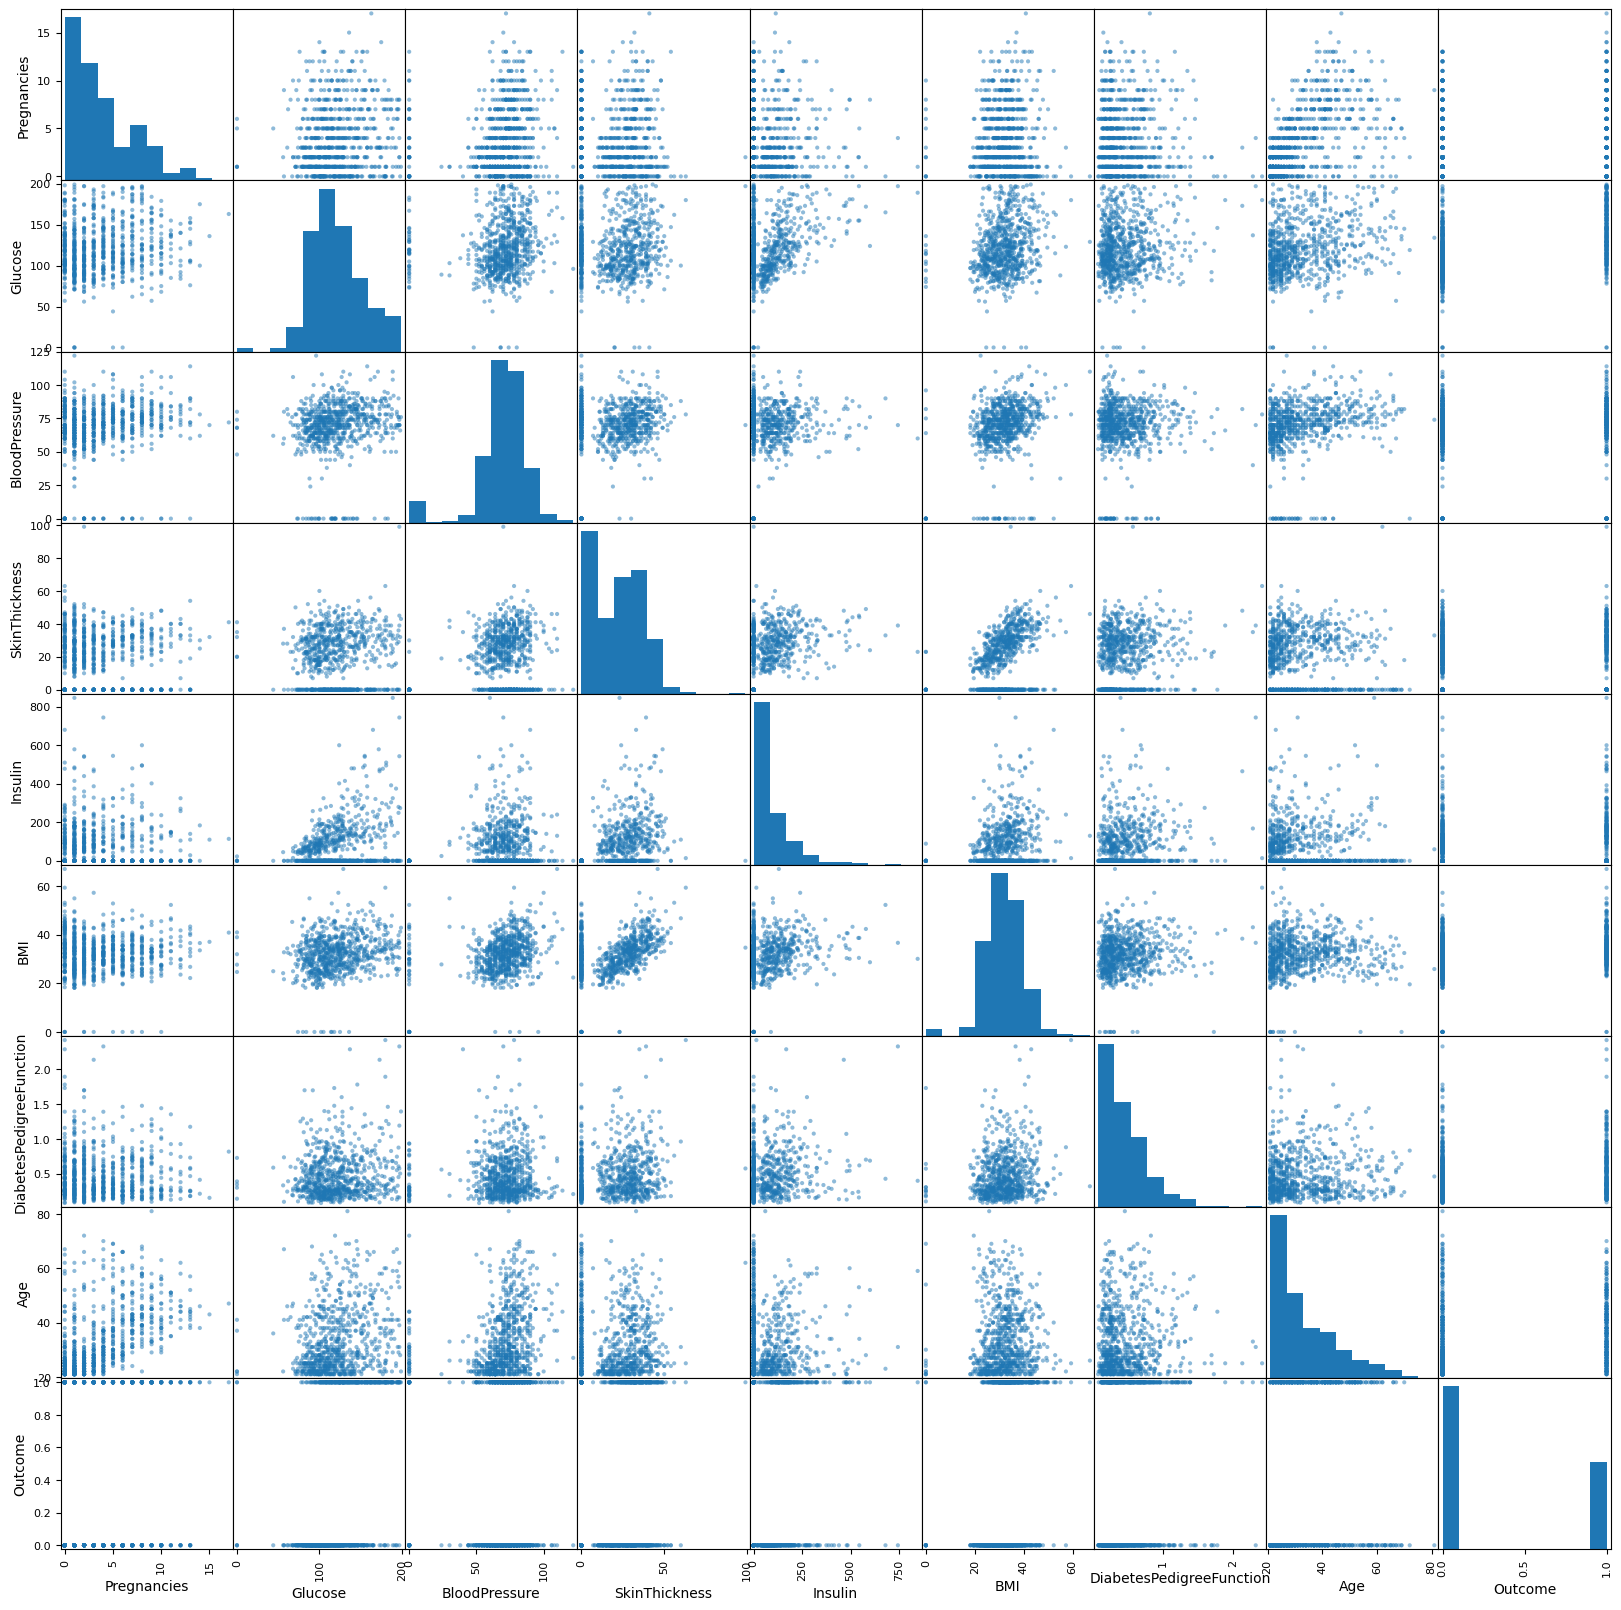

In [7]:
from pandas.plotting import scatter_matrix
scatter_matrix(dataset,figsize=(20,20));

## Replacing the 0 values with their respective mean and median 

In [8]:
dataset['Glucose']=dataset['Glucose'].replace(0,dataset['Glucose'].mean())
dataset['BloodPressure']=dataset['BloodPressure'].replace(0,dataset['BloodPressure'].mean())
dataset['SkinThickness']=dataset['SkinThickness'].replace(0,dataset['SkinThickness'].median())
dataset['Insulin']=dataset['Insulin'].replace(0,dataset['Insulin'].median()) 
dataset['BMI']=dataset['BMI'].replace(0,dataset['BMI'].median()) 

array([[<Axes: xlabel='Pregnancies', ylabel='Pregnancies'>,
        <Axes: xlabel='Glucose', ylabel='Pregnancies'>,
        <Axes: xlabel='BloodPressure', ylabel='Pregnancies'>,
        <Axes: xlabel='SkinThickness', ylabel='Pregnancies'>,
        <Axes: xlabel='Insulin', ylabel='Pregnancies'>,
        <Axes: xlabel='BMI', ylabel='Pregnancies'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Pregnancies'>,
        <Axes: xlabel='Age', ylabel='Pregnancies'>,
        <Axes: xlabel='Outcome', ylabel='Pregnancies'>],
       [<Axes: xlabel='Pregnancies', ylabel='Glucose'>,
        <Axes: xlabel='Glucose', ylabel='Glucose'>,
        <Axes: xlabel='BloodPressure', ylabel='Glucose'>,
        <Axes: xlabel='SkinThickness', ylabel='Glucose'>,
        <Axes: xlabel='Insulin', ylabel='Glucose'>,
        <Axes: xlabel='BMI', ylabel='Glucose'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Glucose'>,
        <Axes: xlabel='Age', ylabel='Glucose'>,
        <Axes: xlabel='Outcom

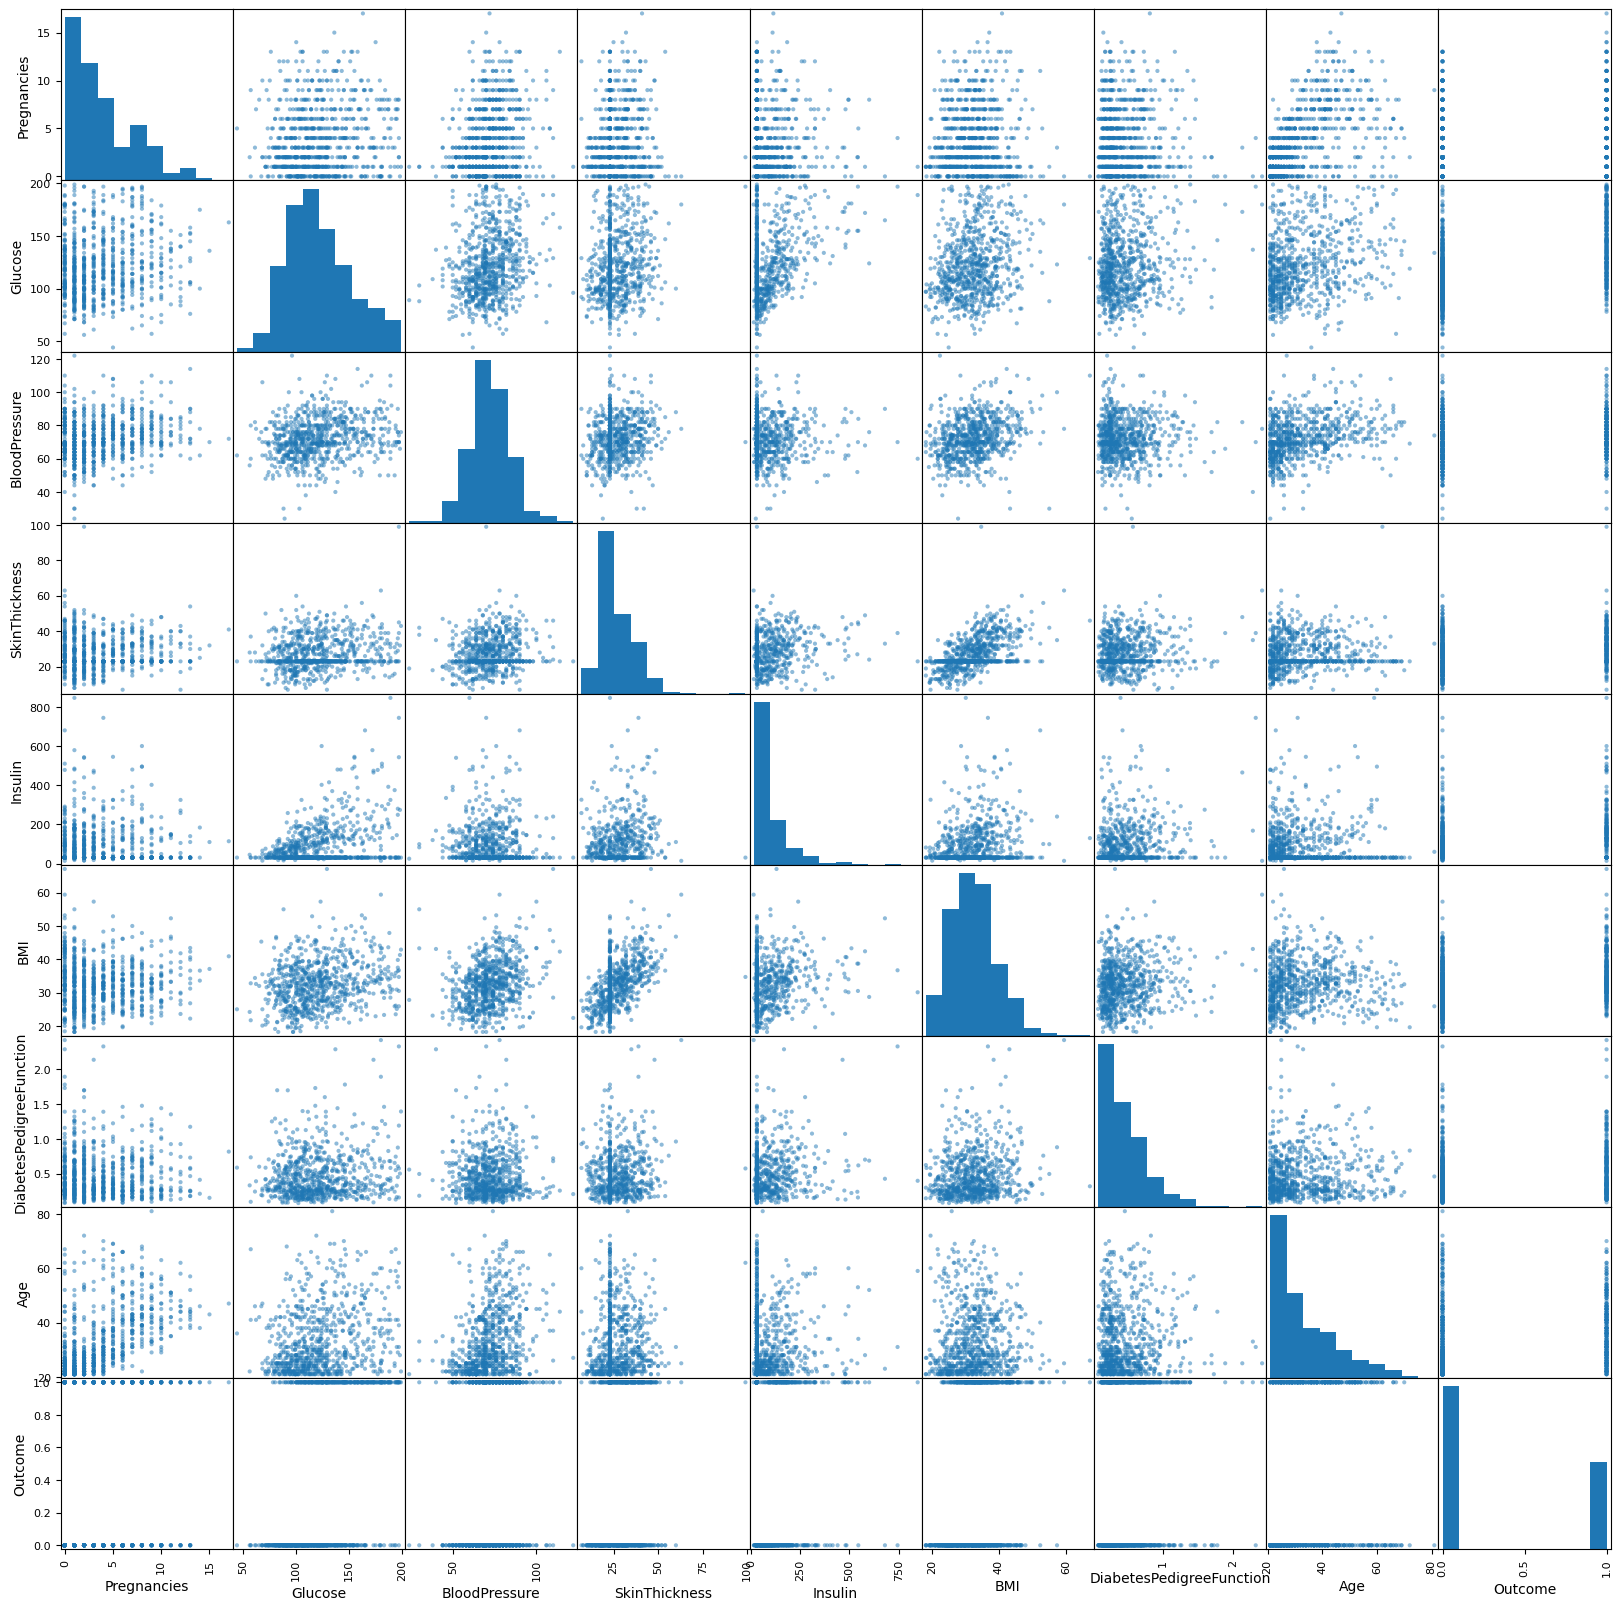

In [9]:
from pandas.plotting import scatter_matrix
scatter_matrix(dataset,figsize=(20,20))

## Splitting the dataset in x and y

In [10]:
x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35,30.5,33.6,0.627,50
1,1,85.0,66.0,29,30.5,26.6,0.351,31
2,8,183.0,64.0,23,30.5,23.3,0.672,32
3,1,89.0,66.0,23,94.0,28.1,0.167,21
4,0,137.0,40.0,35,168.0,43.1,2.288,33


## Splitting the dataset into Training set and Test set

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [12]:
print(x_train)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
603            7    150.0      78.000000             29    126.0  35.2   
118            4     97.0      60.000000             23     30.5  28.2   
247            0    165.0      90.000000             33    680.0  52.3   
157            1    109.0      56.000000             21    135.0  25.2   
468            8    120.0      69.105469             23     30.5  30.0   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0      76.000000             48    180.0  32.9   
192            7    159.0      66.000000             23     30.5  30.4   
629            4     94.0      65.000000             22     30.5  24.7   
559           11     85.0      74.000000             23     30.5  30.1   
684            5    136.0      82.000000             23     30.5  32.0   

     DiabetesPedigreeFunction  Age  
603                     0.692   54  
118                     0.443   22  


In [13]:
print(y_test)


661    1
122    0
113    0
14     1
529    0
      ..
476    1
482    0
230    1
527    0
380    0
Name: Outcome, Length: 154, dtype: int64


## Feature Scaling

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [15]:
print(x_train)

[[ 0.90832902  0.93644016  0.45816047 ...  0.36863635  0.67740401
   1.69955804]
 [ 0.03644676 -0.81628595 -1.03864035 ... -0.63294341 -0.07049698
  -0.96569189]
 [-1.12606292  1.43249471  1.45602768 ...  2.81535261 -0.11855487
  -0.88240283]
 ...
 [ 0.03644676 -0.91549686 -0.62286235 ... -1.13373329 -0.95656442
  -1.04898095]
 [ 2.0708387  -1.2131296   0.12553806 ... -0.36108605 -0.50001442
   0.11706589]
 [ 0.32707418  0.4734559   0.79078287 ... -0.08922869  0.52121586
   2.94889395]]


## Training the Navive bayes model on the Training set

In [16]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB()

## Predicting the test set results 

In [19]:
y_pred = classifier.predict(x_test)

## Making the confusion set matrix

In [49]:
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
cf = confusion_matrix(y_test,y_pred)
print(cf)
report = accuracy_score(y_test,y_pred)
print('\nClassification_report : \n' , report)
print(classification_report(y_test, y_pred))

[[80 19]
 [16 39]]

Classification_report : 
 0.7727272727272727
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        99
           1       0.67      0.71      0.69        55

    accuracy                           0.77       154
   macro avg       0.75      0.76      0.76       154
weighted avg       0.78      0.77      0.77       154



In [22]:
classifier.score(x_train,y_train)

0.744299674267101

In [23]:
classifier.score(x_test, y_test)


0.7792207792207793

# Model 2

## Logistic Regression

## Importing the libraries 

In [24]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report

## Splitting the dataset into x and y

In [26]:
x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35,30.5,33.6,0.627,50
1,1,85.0,66.0,29,30.5,26.6,0.351,31
2,8,183.0,64.0,23,30.5,23.3,0.672,32
3,1,89.0,66.0,23,94.0,28.1,0.167,21
4,0,137.0,40.0,35,168.0,43.1,2.288,33


## Splitting the dataset into Training set and Test set  

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [28]:
print(x_train)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
603            7    150.0      78.000000             29    126.0  35.2   
118            4     97.0      60.000000             23     30.5  28.2   
247            0    165.0      90.000000             33    680.0  52.3   
157            1    109.0      56.000000             21    135.0  25.2   
468            8    120.0      69.105469             23     30.5  30.0   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0      76.000000             48    180.0  32.9   
192            7    159.0      66.000000             23     30.5  30.4   
629            4     94.0      65.000000             22     30.5  24.7   
559           11     85.0      74.000000             23     30.5  30.1   
684            5    136.0      82.000000             23     30.5  32.0   

     DiabetesPedigreeFunction  Age  
603                     0.692   54  
118                     0.443   22  


In [29]:
print(y_test)

661    1
122    0
113    0
14     1
529    0
      ..
476    1
482    0
230    1
527    0
380    0
Name: Outcome, Length: 154, dtype: int64


## Training the Logistic regression model on Training set

In [51]:
model = LogisticRegression()
model.fit(x_train , y_train)

LogisticRegression()

In [31]:
predictions = model.predict(x_test)

In [32]:
accuracy = accuracy_score(y_test , predictions)


In [33]:
report = classification_report(y_test , predictions)

In [34]:
print(f'Accuracy : {accuracy:.2f}')
print('\nClassification_report : \n' , report)

Accuracy : 0.79

Classification_report : 
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       107
           1       0.68      0.60      0.64        47

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.79      0.79      0.79       154



# Model 3

## Decision Tree

## Importing the Libraries

In [35]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

## Splitting the dataset into x and y

In [37]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

## Splitting the dataset into Training and Testing set

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
print(x_train)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
603            7    150.0      78.000000             29    126.0  35.2   
118            4     97.0      60.000000             23     30.5  28.2   
247            0    165.0      90.000000             33    680.0  52.3   
157            1    109.0      56.000000             21    135.0  25.2   
468            8    120.0      69.105469             23     30.5  30.0   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0      76.000000             48    180.0  32.9   
192            7    159.0      66.000000             23     30.5  30.4   
629            4     94.0      65.000000             22     30.5  24.7   
559           11     85.0      74.000000             23     30.5  30.1   
684            5    136.0      82.000000             23     30.5  32.0   

     DiabetesPedigreeFunction  Age  
603                     0.692   54  
118                     0.443   22  


In [40]:
print(y_test)

668    0
324    0
624    0
690    0
473    0
      ..
355    1
534    0
344    0
296    1
462    0
Name: Outcome, Length: 154, dtype: int64


## Training the Decision Tree model on Training set

In [41]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [42]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.7272727272727273
              precision    recall  f1-score   support

           0       0.81      0.75      0.78        99
           1       0.60      0.69      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.73       154



# Model 4

## Random Forest

## Importing the Libraries 

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [44]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [47]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.7727272727272727
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        99
           1       0.67      0.71      0.69        55

    accuracy                           0.77       154
   macro avg       0.75      0.76      0.76       154
weighted avg       0.78      0.77      0.77       154



## Predicting New Results


In [56]:
a = int(input("Enter Pregnancies: "))
b = int(input("Enter Glucose: "))
c = int(input("Enter Blood Pressure: "))
d = int(input("Enter Skin Thickness: "))
e = int(input("Enter insulin: "))
f = int(float(input("Enter BMI: ")))
g = int(float(input("Enter Diabetes Pedigree Function: ")))
h = int(input("Enter your age: "))

print("The result will be either in [0] or [1]\nWhere [0] --> Negative\n[1]--> Positive\nThe result is: ",
      classifier.predict([[a,b,c,d,e,f,g,h]]))

Enter Pregnancies:  1
Enter Glucose:  89
Enter Blood Pressure:  72
Enter Skin Thickness:  20
Enter insulin:  85
Enter BMI:  23.1
Enter Diabetes Pedigree Function:  0.257
Enter your age:  29


The result will be either in [0] or [1]
Where [0] --> Negative
[1]--> Positive
The result is:  [1]
